In [58]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [59]:
#importing training dataset
train = pd.read_csv("customer_churn_dataset-training-master.csv")
test = pd.read_csv("customer_churn_dataset-testing-master.csv")

Pre-processing

In [60]:
#showing first few rows of dataset

train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [61]:
#figure out how many different values are in the columns with string datatype

unique_gender = train["Gender"].unique()

print("Unique values in Gender column:", unique_gender)

unique_subtype = train["Subscription Type"].unique()

print("Unique values in Subscription Type column:", unique_subtype)

unique_contractLenght = train["Contract Length"].unique()

print("Unique values in Contract Length column:", unique_contractLenght)

Unique values in Gender column: ['Female' 'Male' nan]
Unique values in Subscription Type column: ['Standard' 'Basic' 'Premium' nan]
Unique values in Contract Length column: ['Annual' 'Monthly' 'Quarterly' nan]


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [65]:
#There are nan values in columns -> check for nan values in every column
train.isna().sum()
#as only 1 all entries with missing value can be deleted without significant loss of information

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [64]:
#drop missing values
train.dropna(inplace=True)

In [66]:
#replace string values with int

train["Gender"] = train["Gender"].replace({"Female":1, "Male":2})
train["Subscription Type"] = train["Subscription Type"].replace({"Standard":1, "Basic":2, "Premium":3})
train["Contract Length"] = train["Contract Length"].replace({"Annual":1, "Quarterly":2, "Monthly":3})

Outlier Detection

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Usage Frequency'}>,
        <Axes: title={'center': 'Support Calls'}>],
       [<Axes: title={'center': 'Payment Delay'}>,
        <Axes: title={'center': 'Subscription Type'}>,
        <Axes: title={'center': 'Contract Length'}>],
       [<Axes: title={'center': 'Total Spend'}>,
        <Axes: title={'center': 'Last Interaction'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

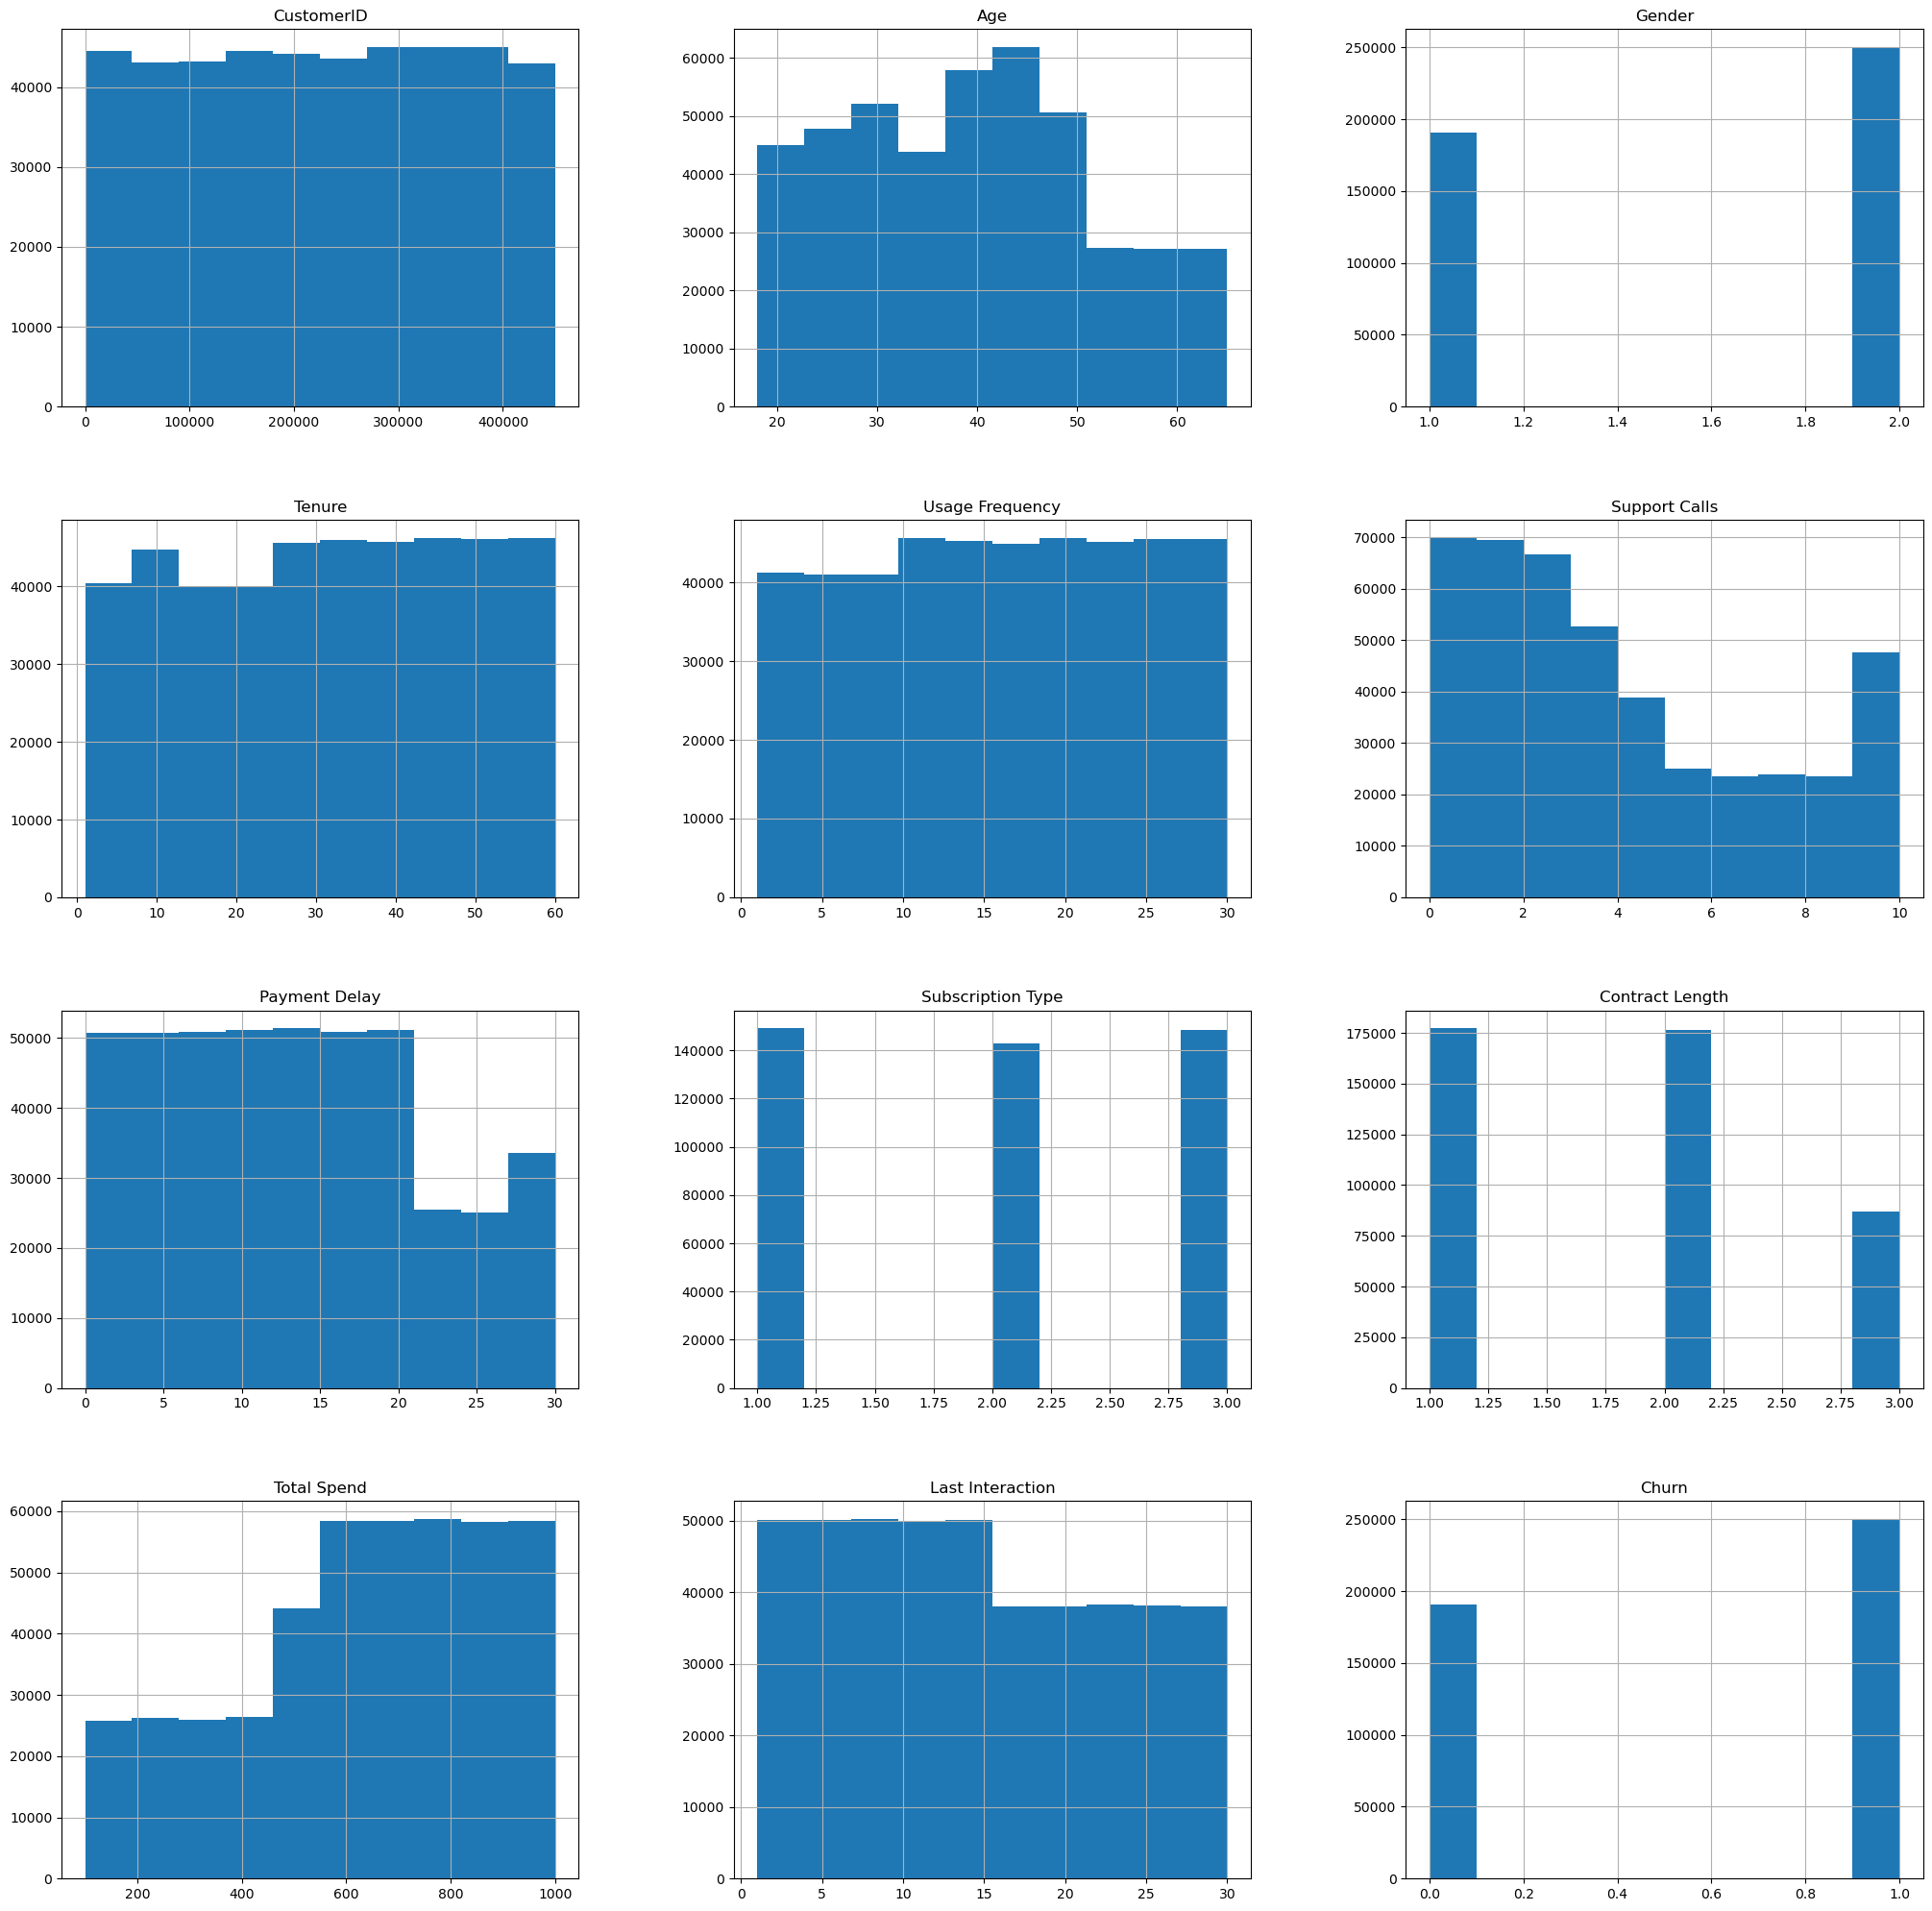

In [55]:
# Distribution with historgrams 
train.hist(bins=10, figsize=(25,25))
#good balance in target variable churn 
#other columns also good balanced and not outlier can be detected visually but needs to be confirmed with IQR

In [ ]:
#formal outlier detection with IQR
